In [1]:
import time
import lhapdf
import numpy as np
from random import sample
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from compressor.pdf_grid import XGrid, PdfSet
from compressor.estimators import Estimators
from compressor.err_function import compute_erfm
from compressor.err_function import compute_erfs
from compressor.err_function import compute_erfc
from compressor.err_function import ErfComputation

In [3]:
# Physical Parameters
pdfname = "NNPDF31_nnlo_as_0118_1000"
Qscale  = 1
nf = 3
# construct grid
x = XGrid().build_xgrid()

# Construct Toy Prior set
pdf = PdfSet(pdfname, x, Qscale, nf).build_pdf()
print(f'Initial pdf shape: {pdf.shape}')

def sampling(replica, number):
    """
    Sample a subset a replicas
    """
    # Construct toy Reduced set
    index = np.random.choice(
        replica.shape[0],
        number,
        replace=False
    )
    return replica[index]

# Construc Toy Prior and Reduced sets
prior = sampling(pdf, 100)
print(f'Prior pdf shape: {prior.shape}')
reduc = sampling(prior, 50)
print(f'Reduced pdf shape: {reduc.shape}')

Initial pdf shape: (1001, 6, 104)
Prior pdf shape: (100, 6, 104)
Reduced pdf shape: (50, 6, 104)


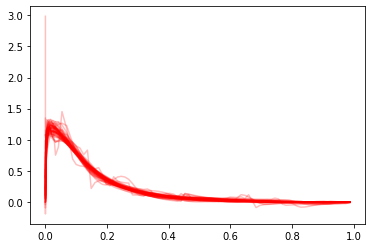

In [4]:
plt.figure()
for p in range(reduc.shape[0]):
    plt.plot(x, reduc[p][3], color="red", alpha=.25)
plt.show()

In [5]:
est = Estimators(prior)

In [6]:
MomentEstimators = [
    "mean",
    "stdev",
    "kurtosis",
    "skewness",
    "moment5th",
    "moment6th"
]

In [7]:
# Test Estimators Only
for st in MomentEstimators:
    print(getattr(est, st, None)().shape)

(6, 104)
(6, 104)
(6, 104)
(6, 104)
(6, 104)
(6, 104)


In [8]:
est.kolmogorov_smirnov().shape

(6, 104, 6)

In [9]:
est1 = Estimators(prior)
est2 = Estimators(reduc)

In [10]:
for st in MomentEstimators:
    print(compute_erfm(est1, est2, st))

12922.790534305444
8.712483680486912
42.857661042774204
786189.1580043307
215706.93949912905
173.89152619166478


In [11]:
compute_erfs(est1, est2, 'kolmogorov_smirnov')

8.64563522480898

In [12]:
erf = ErfComputation(prior, reduc)

In [13]:
for st in MomentEstimators:
    print(erf.normalize_erfm(st))

54077.591893169214
10.574328741869165
44.586731615055434
800099.8468821311
509259.05504881573
167.94564532367875


In [14]:
for st in MomentEstimators:
    print(erf.erfm(st))

0.2769166919843523
0.8327549525119378
0.9783202185859325
0.9415833024054701
0.4089518574254207
1.0841707791035333


In [15]:
%time erf.normalize_erfs('kolmogorov_smirnov')

CPU times: user 7min 20s, sys: 606 ms, total: 7min 21s
Wall time: 7min 21s


7.3184604037254495

In [16]:
%time erf.erfs('kolmogorov_smirnov')

CPU times: user 7min 24s, sys: 650 ms, total: 7min 24s
Wall time: 7min 25s


1.129381681918617